# Homework 4b
code is as solid as a wet noodle at best

In [1]:
import numpy as np
import pandas as pd
import copy
import math as mth
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


made the colors thing so it can be pretty on output the send is there because depending
on the position of the centriod this code breaks and i cant figure it out all i know is it gets
set to nan

In [2]:
df = pd.DataFrame({
    'x': [5, 10, 15, 24, 30, 55, 60, 71, 80, 85],
    'y': [3, 15, 12, 10, 45, 52, 78, 80, 91, 70]
})
colors = {1: 'r', 2: 'g', 3: 'b', 4: 'm', 5: 'c', 6: 'y'}
np.random.seed(200)

In [3]:
def distance(xy, mu):
    return np.sqrt(np.sum((xy.sub(mu)) ** 2, axis=1))

In [4]:
def mean(x):
    return (sum(x) / len(x)) if len(x) != 0 else (sum(x) / 1, 2)

In [5]:
def assign_cluster(df, centroids):
    for i in centroids.keys():
        df['dist{}'.format(i)] = (
            distance(df[['x', 'y']], centroids[i]) # finds the distance
        )
    centroid_distance_cols = ['dist{}'.format(i) for i in centroids.keys()] # makes the colmns for distance from each node
    df['closest_node'] = df.loc[:, centroid_distance_cols].idxmin(axis=1) 
    df['closest_node'] = df['closest_node'].map(lambda x: int(x.lstrip('dist'))) 
    df['color'] = df['closest_node'].map(lambda x: colors[x]) #sets the color of the points to the closest node
    return df

In [6]:
def calculate_new_centroid(k, centroids):
    for i in centroids.keys():
        centroids[i][0] = mean(df[df['closest_node'] == i]['x'])
        centroids[i][1] = mean(df[df['closest_node'] == i]['y'])
    return k

In [11]:
def do_cluster(df, k):
    centroids = {
        i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
        for i in range(k)
    }
    df = assign_cluster(df, centroids)
    while True:
        closest_centroids = df['closest_node'].copy(deep=True)
        centroids = calculate_new_centroid(centroids, centroids)
        df = assign_cluster(df, centroids)
        if closest_centroids.equals(df['closest_node']):
            break
    plt.scatter(df['x'], df['y'], color=df['color'],
                alpha=0.2, edgecolor='k')
    for i in centroids.keys():
        x, y = centroids[i]
        plt.scatter(x, y, s=100, color='green')
    plt.show()

im afraid to touch this code it might break

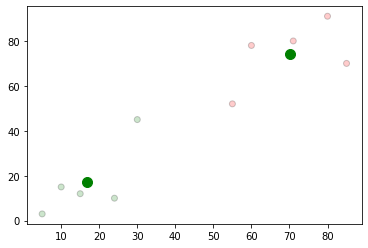

In [12]:
do_cluster(df, k=2)

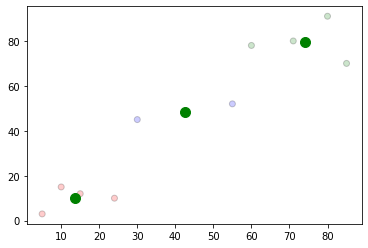

In [14]:
do_cluster(df, k=3)